# My Predictive Modelling Package (AbberKit-Learn)

This is my implementation of some popular machine learning algorithms, including:

+ Linear Regression
+ Logistics Regression
+ Naive Bayes
+ Decison Trees
+ Random Forest
+ Gradient Boosting
+ Neural Network


In [51]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [74]:
class Preprocessor(object):
    
    def __init__(self):
        pass
    
    def StandardScale(self, features):
        pass
    
    def one_hot_encoder(self, features):
        pass


In [75]:
class ModelSelection(object):
    def __init__(self):
        pass
    
    def train_test_sample(self, test_ratio = 0.3):
        train_idx = np.random.choice(len(self.X), len(self.X) - test_ratio*len(self.X))
        test_idx = np.random.choice(len(self.X), test_ratio*len(self.X))
        
        Xtrain = self.X[train_idx]
        Ytrain = self.Y[train_idx]
        
        Xtest = self.X[test_idx]
        Ytest = self.Y[test_idx]
        
        return ((Xtrain, Ytrain), (Xtest, Ytest))
    

In [76]:
class LinearRegression(object):
    
    def __init__(self):
        # self.X '''features'''
        # self.Y '''labels'''
        # self.w '''weights (coefficients)''' 
        # self.b '''intercept'''
        # self.y_hat '''model'''
        pass
    

    def fit(self, features, labels, regularization='L2', dim = 'multi', fit_intercept = False, l2 = 1000.0, learning_rate = 0.005, epoch = 1000):
        self.X = features
        self.Y = labels
        
        self.regularization = regularization
        self.dim = dim
        self.fit_intercept = fit_intercept
        
        if self.dim == '1d':
            xDotx = self.X.dot(self.X)
            xDoty = self.X.dot(self.Y)

            xMean = self.X.mean()
            yMean = self.Y.mean()
            xSum = self.X.sum()

            denominator =  xDotx - xMean * xSum
            self.w = (xDoty - yMean * xSum) / denominator
            self.b = (yMean * xDotx - xMean * xDoty) / denominator
            
        else:
            self.X = np.vstack([np.ones(len(self.X)), self.X]).T
            
            if self.regularization == None:
                # No Regularization
                self.w = np.linalg.solve(np.dot(self.X.T, self.X), np.dot(self.X.T, self.Y))
    
            elif self.regularization == 'L1':
                # L1 Regularization --- maximum likelihood
                self.w = np.linalg.solve(np.dot(self.X.T, self.X), np.dot(self.X.T, self.Y))
                            
            elif self.regularization == 'L2':
                # L2 Regularization  --- maximum a posteriori (map)
                self.w = np.linalg.solve(l2*np.eye(2) + self.X.T.dot(self.X), self.X.T.dot(self.Y))
                
            elif self.regularization == "GD":
                # Gradient Descent
                pass
                
                                
    def predict(self, features):
        self.X = features
        
        if self.dim == '1d':
            self.y_hat = (self.w * self.X) + self.b
            return self.y_hat
            
        else:
            if self.regularization == None:
                # No regularization
                self.y_hat = np.dot(self.X, self.w)
                return sel.y_hat
    
            elif self.regularization == 'L1' or self.regularization == 'L2':
                # L1 & L2 Regularization Predictions
                self.y_hat = np.dot(self.X, self.w)
                return self.y_hat
            
            elif self.regularization == 'GD':
                # Gradient Descent Regularization
                self.costs = []
                self.w = np.random.randn(self.X.shape[1]) / np.sqrt(self.X.shape[1])

                for t in range(epoch):
                    delta = self.predict(self.X) - self.Y
                    self.w = self.w - learning_rate * self.X.T.dot(delta)
                    
                    mse = delta.dot(delta)
                    self.costs.append(mse)
            
            
    def coeff(self):
        return self.w
    
    
    def intercept(self):
        return self.b
    
    
    def show_metrics(self):
        # # Calculated Squared Error (Squared - residual)
        d1 = self.Y - self.y_hat
        SSres = d1.dot(d1)
        # # OR: SSres = ((Y - yhat)**2).sum()

        d2 = self.Y - self.Y.mean()
        SStot = d2.dot(d2)
        # # OR: SStot = ((Y - Y.mean())**2).sum()

        r_squared = 1 - SSres/SStot

        print('\nSquared Error (SSres): ', SSres)
        print('Predicted Mean (SStot): ', SStot)
        print('R-Squared: ', r_squared)
        print('\n')
        
        return (SSres, SStot, r_squared)
    


# Test The Class Package

### 1-Dimensional Linear Regression

This is a linear regression problem with only a single feature (1 column).

0.4458213596141391
0.23720085507546806


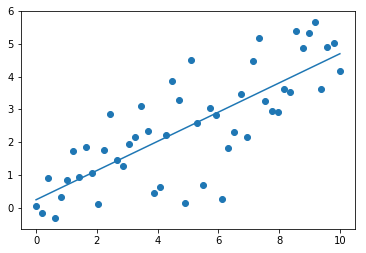


Squared Error (SSres):  53.10658804106967
Predicted Mean (SStot):  139.3020890538092
R-Squared:  0.618766750722914


(53.10658804106967, 139.3020890538092, 0.618766750722914)

Labels:  [ 0.03791713 -0.15570377  0.89069603 -0.33432383  0.32895896]
Predictions:  [0.23720086 0.32818481 0.41916876 0.51015271 0.60113666]


In [77]:
# Create random data
N = 50
X = np.linspace(0, 10, N)
Y = 0.5*X + np.random.randn(N)

lr = LinearRegression()
lr.fit(X, Y, dim='1d')
yhat = lr.predict(X)

print(lr.coeff())
print(lr.intercept())

plt.scatter(X, Y)
plt.plot(X, yhat)
plt.show()

print(lr.show_metrics())

print('\nLabels: ', Y[:5])
print('Predictions: ', yhat[:5])

### 1-Dimensional Linear Regression (with Outliers)

Notice how the presence of outliers drastically affects the model performance. Hence the outliers try to pull the line of best fit away from the majority distribution. This model would perform even babdly with new dataset (different from the training data).

This is an over-fitting problem, and one way to resolve this problem is using the concept of regularization, there are various regularization methods and this methods help to better optimize a model to ensure it generalizes (generalization) well to newly presented data.

1.1773192850175271
-2.2687102547999296


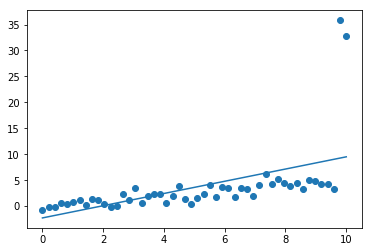


Squared Error (SSres):  1513.187322261962
Predicted Mean (SStot):  2114.2937477941323
R-Squared:  0.2843060128987809


(1513.187322261962, 2114.2937477941323, 0.2843060128987809)

Labels:  [-0.6800911  -0.21399967 -0.13746717  0.69773213  0.32288439]
Predictions:  [-2.26871025 -2.02844101 -1.78817177 -1.54790253 -1.30763329]


In [78]:
# Create random data
N = 50
X = np.linspace(0, 10, N)
Y = 0.5*X + np.random.randn(N)

# add outliers to data
Y[-1] += 30
Y[-2] += 30

lr = LinearRegression()
lr.fit(X, Y, dim='1d')
yhat = lr.predict(X)

print(lr.coeff())
print(lr.intercept())

plt.scatter(X, Y)
plt.plot(X, yhat)
plt.show()

print(lr.show_metrics())

print('\nLabels: ', Y[:5])
print('Predictions: ', yhat[:5])

# Multi Variate Linear Regression

Features with more than 1 dimension

In [79]:
# Create random data
N = 50
X = np.linspace(0, 10, N)
Y = 0.5*X + np.random.randn(N)

# add outliers to data
Y[-1] += 30
Y[-2] += 30

lr = LinearRegression()
lr.fit(X, Y, dim='multi', regularization='GD')
yhat = lr.predict(X)

print(lr.coeff())
print(lr.intercept())

plt.scatter(X, Y)
plt.plot(X, yhat)
plt.show()

print(lr.show_metrics())

print('\nLabels: ', Y[:5])
print('Predictions: ', yhat[:5])

IndexError: tuple index out of range

In [82]:
from nose.tools import assert_equal

class RegressionTest(object):
    
    def __init__(self):
        pass
    
    def test(self):
        pass
    